### 1. CART에서 criterion을 gini와 entropy를 각각 적용하고 max_depth를 변경하여 결과를 비교하고 해석하라. (교재에 있는 데이터를 사용해도 된다)

- 그림은 pydotplus를 활용해서 이쁘게 그리자 껄껄

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']

In [2]:
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
from sklearn import tree
from sklearn import metrics

In [16]:
from sklearn import tree
from sklearn import metrics

def gini(num):
    dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=num, random_state=17)
    dtc.fit(X_train, y_train)
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)
    print("num %d" % (num))
    print(metrics.accuracy_score(y_train, y_train_pred))
    print(metrics.accuracy_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))
    print('-' * 20)
    
def entropy(num):
    dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=num, random_state=17)
    dtc.fit(X_train, y_train)
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)
    print("num %d" % (num))
    print(metrics.accuracy_score(y_train, y_train_pred))
    print(metrics.accuracy_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))
    print('-' * 20)

In [19]:
for i in range(1, 40):
    print(gini(i))

num 1
0.6666666666666666
0.6666666666666666
[[15  0  0]
 [ 0 15  0]
 [ 0 15  0]]
--------------------
None
num 2
0.9523809523809523
0.9555555555555556
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
--------------------
None
num 3
0.9523809523809523
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 4
0.9714285714285714
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 5
0.9904761904761905
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 6
1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 7
1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 8
1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 9
1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 10
1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 

In [20]:
for i in range(1, 40):
    print(entropy(i))

num 1
0.6666666666666666
0.6666666666666666
[[15  0  0]
 [ 0 15  0]
 [ 0 15  0]]
--------------------
None
num 2
0.9523809523809523
0.9555555555555556
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
--------------------
None
num 3
0.9523809523809523
0.9555555555555556
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
--------------------
None
num 4
0.9523809523809523
0.9333333333333333
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
--------------------
None
num 5
0.9714285714285714
0.9555555555555556
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
--------------------
None
num 6
0.9809523809523809
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 7
0.9904761904761905
0.9555555555555556
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
--------------------
None
num 8
1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 9
1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
--------------------
None
num 10
1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


### Dummy Codes

In [7]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [8]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9777777777777777


In [9]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [10]:
!pip install pydotplus

In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,
                          filled = True,
                          rounded = True,
                          class_names = ['Setosa', 'Versicolor', 'Virginica'],
                          feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)

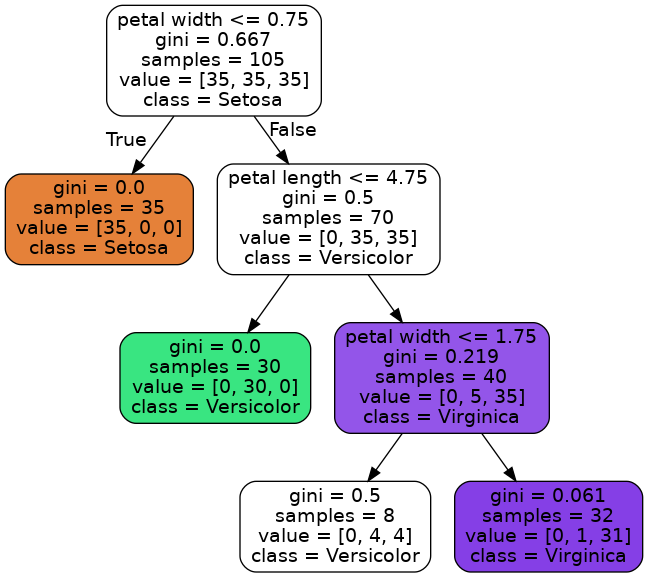

In [12]:
from IPython.display import Image
Image(graph.create_png())

### criterion='entropy', max_depth=3

In [13]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [14]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [15]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9555555555555556


In [16]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [17]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,
                          filled = True,
                          rounded = True,
                          class_names = ['Setosa', 'Versicolor', 'Virginica'],
                          feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)

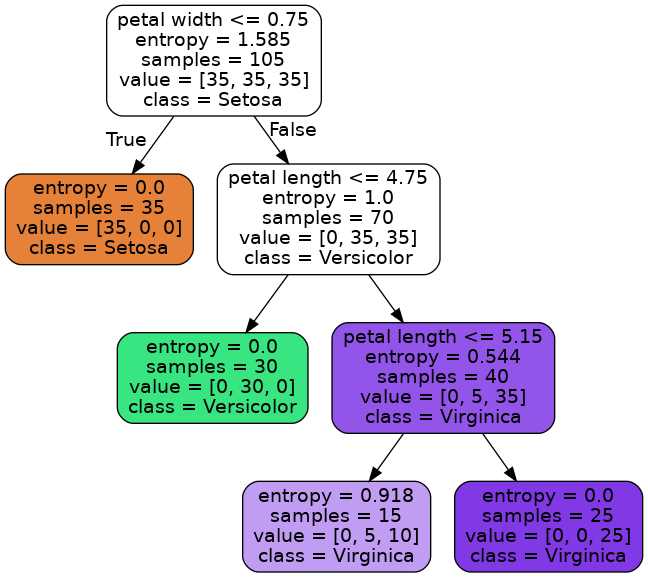

In [18]:
from IPython.display import Image
Image(graph.create_png())

## max_depth=4

### criterion='gini', max_depth='4'

In [19]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [20]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [21]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9714285714285714
0.9777777777777777


In [22]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [23]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,
                          filled = True,
                          rounded = True,
                          class_names = ['Setosa', 'Versicolor', 'Virginica'],
                          feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)

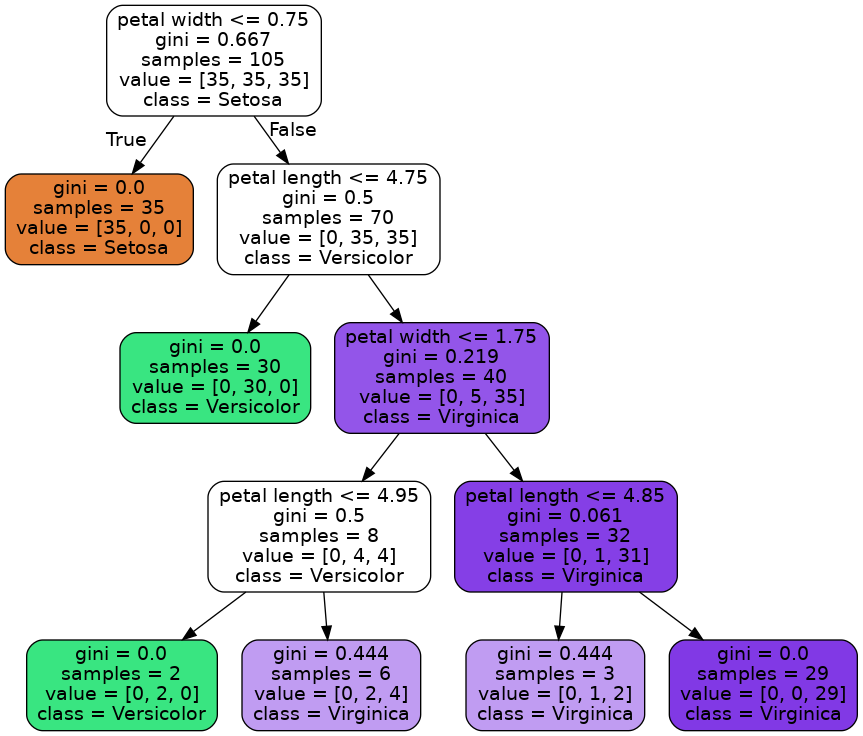

In [24]:
from IPython.display import Image
Image(graph.create_png())

### criterion='entropy', max_depth='4'

In [25]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [26]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [27]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9333333333333333


In [28]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


In [29]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,
                          filled = True,
                          rounded = True,
                          class_names = ['Setosa', 'Versicolor', 'Virginica'],
                          feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)

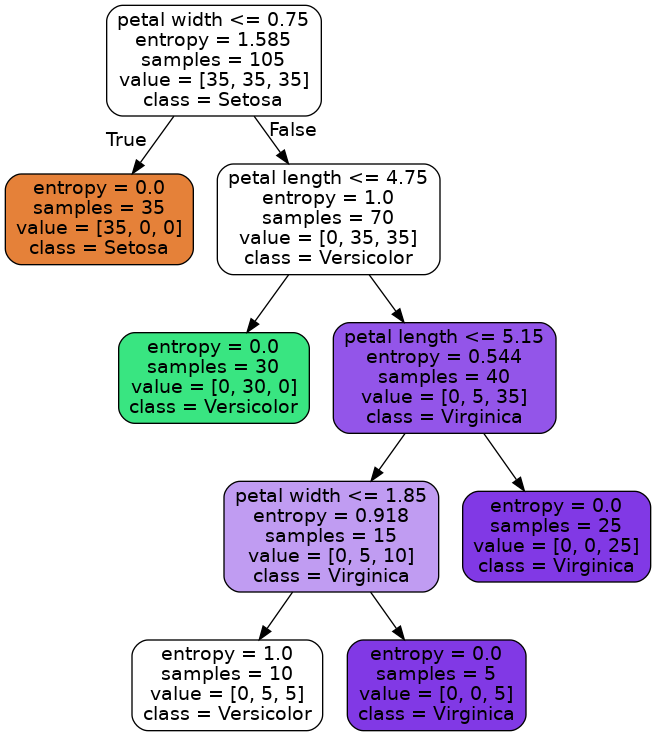

In [30]:
from IPython.display import Image
Image(graph.create_png())

## max_depth = 5

### criterion='gini', max_depth=5

In [31]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [32]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [33]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9904761904761905
0.9777777777777777


In [34]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [35]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,
                          filled = True,
                          rounded = True,
                          class_names = ['Setosa', 'Versicolor', 'Virginica'],
                          feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)

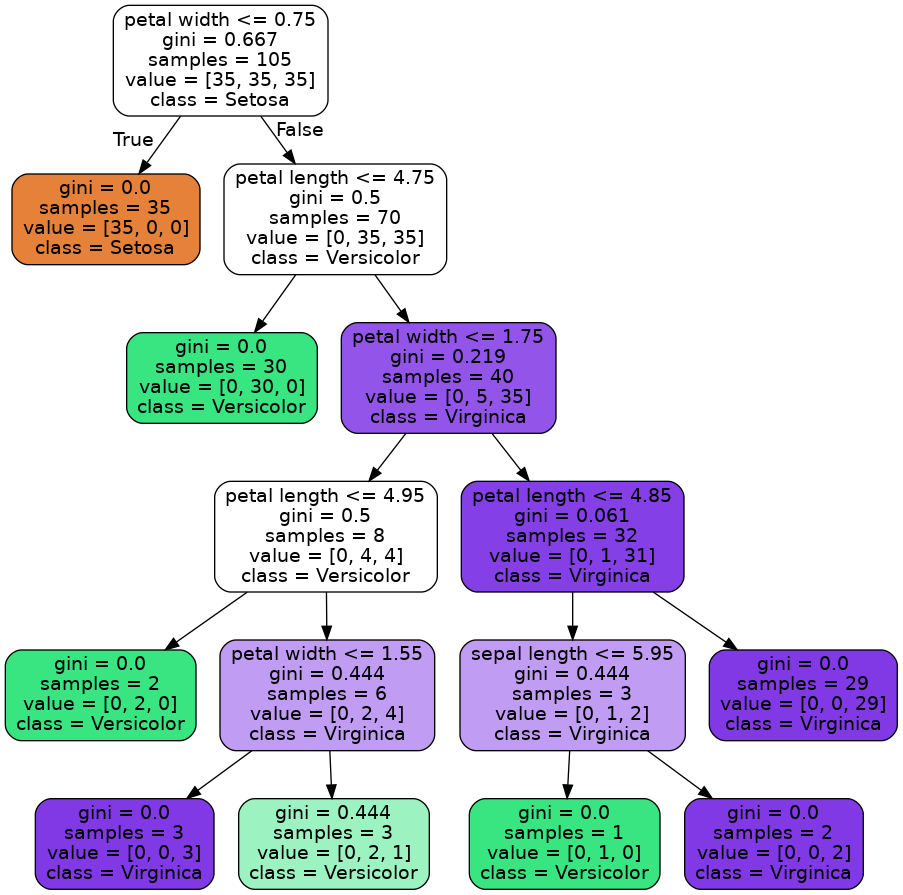

In [36]:
from IPython.display import Image
Image(graph.create_png())

### criterion='entropy', max_depth=5

In [37]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [38]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [39]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9714285714285714
0.9777777777777777


In [40]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [41]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,
                          filled = True,
                          rounded = True,
                          class_names = ['Setosa', 'Versicolor', 'Virginica'],
                          feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)

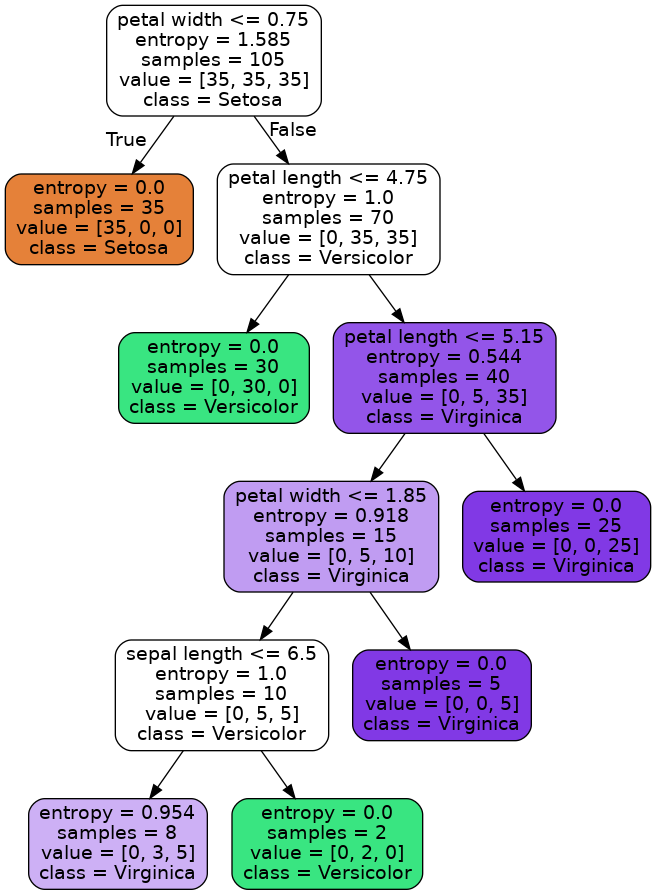

In [42]:
from IPython.display import Image
Image(graph.create_png())